
# Make graphs for EVI, Yeild, and flood flag


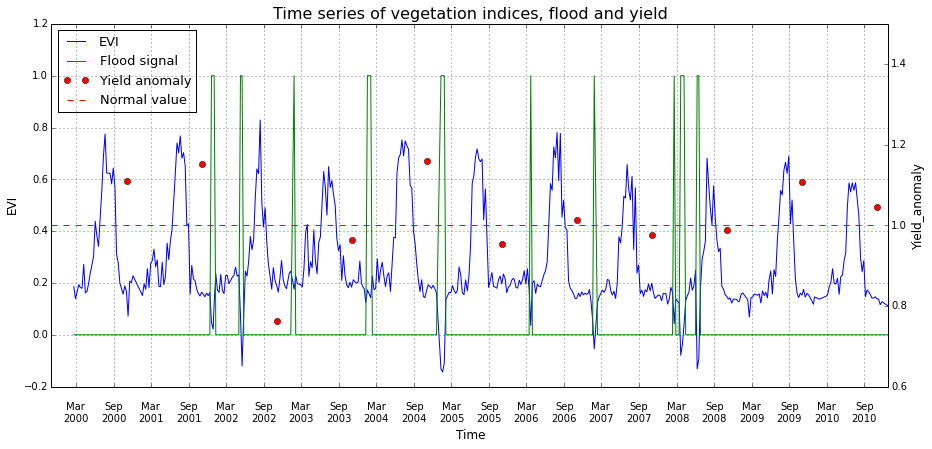

In [45]:
import pandas as pd
import datetime
from matplotlib import pyplot as plt
import time as t
import matplotlib.dates as matdates
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
%matplotlib inline

index_path= "/home/faizan/USA_data/index_output/all_year.csv"
yeild_path= "/home/faizan/USA_data/index_output/US_far_yeild.csv"
pic_path = "/home/faizan/USA_data/image_output/yeild_anomaly/"
ti= "Time series of vegetation indices, flood and yield " 

CNTY = "US"
LOC = "near"

if CNTY == "Pak":
    if LOC == "near":
        R = 80
        A , B = 2001 , 2015
    else:
        R = 62
        A , B = 1999 , 2015
else:
    if LOC == "near":
        R = 83
        A , B = 1999 , 2011
    else:
        R = 63
        A , B = 1999 , 2011
  
for i in range (33,34):
    
    data = pd.read_csv(index_path)
    
    data1 = data[data["ID"] == i]
    data1 = data1[data1["CNTY"] == CNTY]
    data2 = data1[data1["LOC"] == LOC]
    data2 = data2[data2["EVI"] >-999]
    dates = [datetime.datetime.strptime(str(j[:10]), "%Y-%m-%d") for j in data2["DATE"]]
    data2.index = dates
    dummy = data2
    dummy = data2[data2.index.year > A]
    dummy = dummy[dummy.index.year < B]
    time = dummy.index
    evi  = dummy["EVI"]
    ndvi = dummy["NDVI"]
    lswi = dummy["LSWI"]
    flood = dummy["FLOOD"]
    
    lat=pd.Series.mean(data2["LAT"])
    lon=pd.Series.mean(data2["LON"])
    typ=pd.Series.mean(data2["TYP"])
    
    data = pd.read_csv(yeild_path)
    data1 = data[data["ID"] == i]
    dates = [datetime.datetime.strptime((str(j)+"-11"), "%Y-%m") for j in data1["year"]]
    data1.index = dates
    dummy = data1
    dummy2 = data1[data1.index.year > (A-1)]
    dummy2 = dummy2[dummy2.index.year < B]
    time1= dummy2.index
    dummy = data1[data1.index.year > A]
    dummy = dummy[dummy.index.year < B]
    time2= dummy.index
    yld = dummy["yield_anomaly"]
    #dates2 = [datetime.datetime.strptime(str(j+1), "%Y") for j in dummy["year"]]
    #time2=dates2
    nor = []
    for k in  range(len(dummy2)):
        time1
        nor.append(1)

    if typ == 1:
        area="Water"
    elif typ == 2:
        area=  "Crop"
    elif typ == 3:
        area= "Flooded Crop"
    else:
        area = "Desert"

    fig = plt.figure(figsize=(15,6.5))
    ax = fig.add_subplot(111)

    lns1 = ax.plot(time, evi, 'b', label = 'EVI')
    #lns2 = ax.plot(time, lswi, 'b', label = 'lswi')
    #lns3 = ax.plot(time, ndvi, 'c', label = 'ndvi')
    lns4 = ax.plot(time, flood, 'g', label = 'Flood signal')
    ax2 = ax.twinx()
    lns5 = ax2.plot(time2, yld , 'ro', label = 'Yield anomaly')
    lns6 = ax2.plot(time1, nor , 'r--', label = 'Normal value')

    # added these lines
    lns = lns1+lns4+lns5+lns6
    labs = [l.get_label() for l in lns]
    ax.legend(lns, labs, loc=2, prop={'size':13})
    Title= ti 
    ax.grid()
    ax.set_title(Title, fontsize=16)
    ax.set_xlabel("Time", fontsize=12)
    ax.set_ylabel("EVI" ,fontsize=12)
    ax2.set_ylabel("Yield_anomaly", fontsize=12)
    ax2.set_ylim(0.6, 1.5)
    ax.set_ylim(-0.2,1.2)
    ax.xaxis.set_major_locator(matdates.MonthLocator(interval=6))
    ax.xaxis.set_major_formatter(matdates.DateFormatter('\n%b\n%Y'))
    #for tick in ax.xaxis.get_minor_ticks():
    #            tick.label.set_fontsize(10) 
    #           tick.label.set_rotation(45)
    pic= pic_path+"y1.png"
    #fig.savefig(pic)

same code for near different year plot